In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [148]:
df = pd.read_csv(r"D:\Git\aa_project\Data\frankfurt_kpi.csv")

In [149]:
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

,datetime,temperature,precipitation,wind_speed,num_trips,distance,duration
0,2019-02-01 00:00:00,-0.3,0.0,2.5,0,0.000,0
1,2019-02-01 01:00:00,-0.1,0.0,2.4,1,1.888,12
2,2019-02-01 02:00:00,-0.3,0.2,1.7,0,0.000,0
3,2019-02-01 03:00:00,-0.3,0.7,1.6,1,0.744,8
4,2019-02-01 04:00:00,0.0,0.0,2.1,0,0.000,0


In [150]:
df.datetime = pd.to_datetime(df.datetime)

In [151]:
df["hour"] = df["datetime"].apply(lambda value: value.hour)

In [152]:
df["day"] = df["datetime"].apply(lambda value: value.day)

In [153]:
df["month"] = df["datetime"].apply(lambda value: value.month)

In [154]:
df["weekday"] = df["datetime"].apply(lambda value: value.weekday())

In [155]:
df.drop(columns = ["datetime"], inplace = True)
df

,temperature,precipitation,wind_speed,num_trips,distance,duration,hour,day,month,weekday
0,-0.3,0.0,2.5,0,0.000,0,0,1,2,4
1,-0.1,0.0,2.4,1,1.888,12,1,1,2,4
2,-0.3,0.2,1.7,0,0.000,0,2,1,2,4
3,-0.3,0.7,1.6,1,0.744,8,3,1,2,4
4,0.0,0.0,2.1,0,0.000,0,4,1,2,4
...,...,...,...,...,...,...,...,...,...,...
3595,33.9,0.0,5.1,9,19.170,416,19,30,6,6
3596,31.4,0.0,7.4,16,40.958,666,20,30,6,6
3597,28.3,0.0,4.7,20,44.158,621,21,30,6,6
3598,26.8,0.0,5.4,11,18.441,206,22,30,6,6


Text(0, 0.5, 'Number of trips')

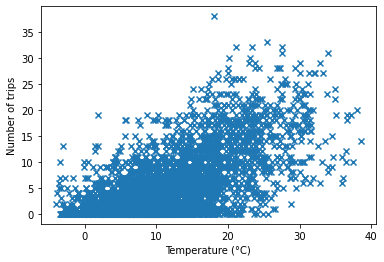

In [156]:
# df_summer = df[list(map(lambda x : str(x) in ["6", "7", "8"], df.month))].copy()
plt.scatter(df["temperature"], df["num_trips"], marker='x')
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of trips")

Text(0, 0.5, 'Number of trips')

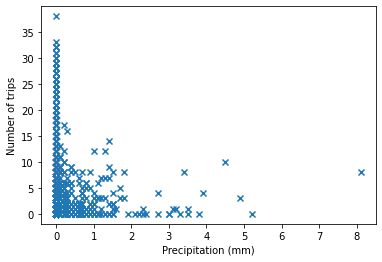

In [157]:
plt.scatter(df["precipitation"], df["num_trips"], marker='x')
plt.xlabel("Precipitation (mm)")
plt.ylabel("Number of trips")

In [158]:
df_X = df.drop(columns = ["distance", "duration", "day", "num_trips"])
df_Y = df["num_trips"]

- xp = temperature, precipitation, wind_speed, month, weekday, hour
- yp = num_trips

In [159]:
xp = df_X.to_numpy()
xp = StandardScaler().fit_transform(xp)
yp = df_Y.to_numpy()

In [160]:
X_train, X_test, y_train, y_test = train_test_split(xp, yp, test_size=0.3)

In [161]:
model = LinearRegression(fit_intercept = True)
model.fit (X_train, y_train)

model_pred = model.predict(X_test)
r2_score(y_test, model_pred)

0.42444917051154774

In [162]:
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(X_train)

model = LinearRegression(normalize = True)
model.fit(x_poly, y_train)

y_pred = model.predict(poly_reg.fit_transform(X_test))
r2_score(y_test, y_pred)

0.5650269147872904